# The following code uses the Wholesale customers dataset for classification


the dataset can be found at:
- https://archive.ics.uci.edu/dataset/292/wholesale+customers

the following code focuses on data cleaning and classification using k-nearest neighbour and decision trees

the target of this dataset is the Channel of the observation, and the aim of this experiment is to see if the annual spending on various products is indicitive of the channel for the clients of a wholesale distributor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'svg'
#elationship between features, a


In [2]:
sale = pd.read_csv("Wholesale customers data.csv")

In [3]:
sale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- (Minimum, Maximum, Mean, Std. Deviation)
- FRESH ( 3, 112151, 12000.30, 12647.329)
- MILK (55, 73498, 5796.27, 7380.377)
- GROCERY (3, 92780, 7951.28, 9503.163)
- FROZEN (25, 60869, 3071.93, 4854.673)
- DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
- DELICATESSEN (3, 47943, 1524.87, 2820.106)

In [4]:
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
print(sale.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


- FRESH: annual spending (m.u.) on fresh products (Continuous);
- MILK: annual spending (m.u.) on milk products (Continuous);
- GROCERY: annual spending (m.u.)on grocery products (Continuous);
- FROZEN: annual spending (m.u.)on frozen products (Continuous)
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
- DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
- CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
- REGION: customersâ€


- REGION Frequency
- Lisbon 77  - 1
- Oporto 47  -2
- Other Region 316  -3
- 
- CHANNEL Frequency
- Horeca 298 -- 1 (catering)
- Retail 142 -- 2
- 

In [7]:
print("chanel")
print(len(sale[sale.Channel == 1]))
print(len(sale[sale.Channel == 2]))
print("region")
print(len(sale[sale.Region == 1]))
print(len(sale[sale.Region == 2]))
print(len(sale[sale.Region == 3]))


chanel
298
142
region
77
47
316


In [8]:
sale.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [9]:
print(sale.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [10]:
column_values  = sale.columns.tolist()
for column in column_values:
    print('Unique values for ' + column)
    print(sale[column].unique())
    print('')


Unique values for Channel
[2 1]

Unique values for Region
[3 1 2]

Unique values for Fresh
[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465 

changing region and channel back to string values for clearer graphs

In [11]:
graph_dataset = sale.copy()

In [12]:

region = graph_dataset.copy()
for title in region.columns:
    if title =="Region":
        continue
    else:
        region.drop(title, axis = 1, inplace = True)
channel = graph_dataset.copy()
for title in channel.columns:
    if title =="Channel":
        continue
    else:
        channel.drop(title, axis = 1, inplace = True)
        

graph_dataset.drop("Region",axis = 1, inplace =True)
graph_dataset.drop("Channel",axis = 1, inplace =True)

In [13]:
region.replace([1,"Lisborn"], 'Lisborn-1', inplace=True)
region.replace([2,"Oporto"], 'Oporto-2', inplace=True)
region.replace([3,"other"], 'other-3', inplace=True)

region['Region'] = region['Region'].astype(str)

channel.replace([1,"Horeca"], 'Horeca-1', inplace=True)
channel.replace([2,"Retail"], 'Retail-2', inplace=True)


channel['Channel'] = channel['Channel'].astype(str)



In [14]:
graph_dataset["Region"] = region
graph_dataset["Channel"]= channel

In [15]:
graph_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Fresh             440 non-null    int64 
 1   Milk              440 non-null    int64 
 2   Grocery           440 non-null    int64 
 3   Frozen            440 non-null    int64 
 4   Detergents_Paper  440 non-null    int64 
 5   Delicassen        440 non-null    int64 
 6   Region            440 non-null    object
 7   Channel           440 non-null    object
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [16]:
graph_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


# Data exploration

In [17]:
sale.describe().T


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


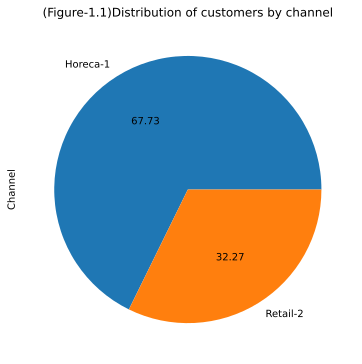

In [18]:
fig = plt.gcf() 
fig.set_size_inches(6,10)
graph_dataset["Channel"].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("(Figure-1.1)Distribution of customers by channel")
plt.savefig('pie.png', bbox_inches='tight')

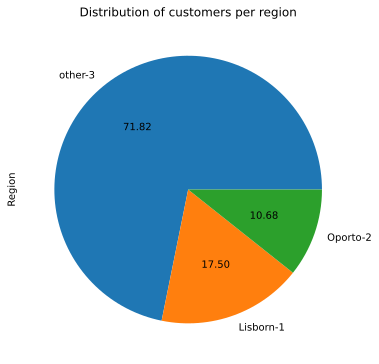

In [19]:
fig = plt.gcf() 
fig.set_size_inches(6,10)
graph_dataset["Region"].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("Distribution of customers per region")
plt.show()

<Figure size 720x576 with 0 Axes>

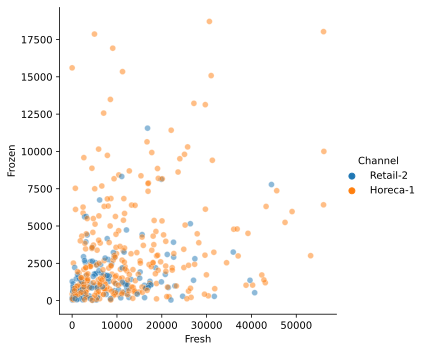

In [20]:
fig = plt.gcf() 
fig.set_size_inches(10,8)
test_data = graph_dataset.where((graph_dataset["Frozen"]<20000) & (graph_dataset["Fresh"]<60000))
sns.relplot(test_data["Fresh"], test_data["Frozen"], hue = test_data["Channel"], alpha = 0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

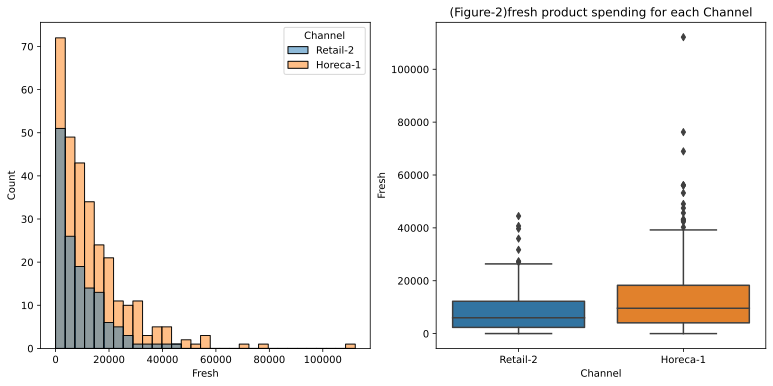

In [21]:

fig = plt.gcf() 
fig, ax =plt.subplots(1,2)
plt.title("(Figure-2)fresh product spending for each Channel")
fig.set_size_inches(13,6)
sns.boxplot(graph_dataset["Channel"], graph_dataset["Fresh"],ax = ax[1])

sns.histplot( data = graph_dataset,x = "Fresh", hue = "Channel",ax =ax[0] )
# plt.xticks(x,values)

plt.savefig('fresh.png', bbox_inches='tight')



<Figure size 432x288 with 0 Axes>

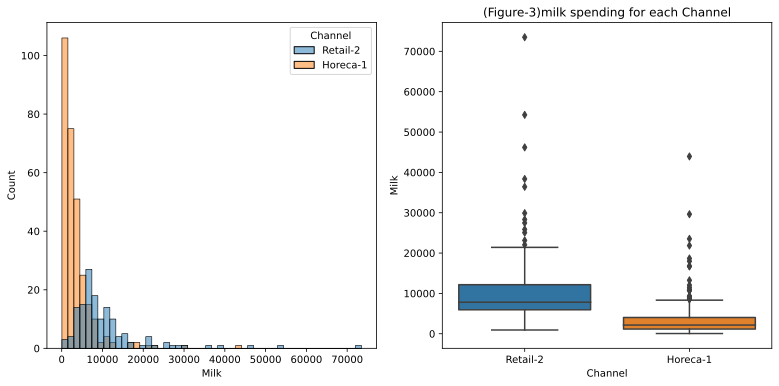

In [22]:
fig = plt.gcf() 
fig, ax =plt.subplots(1,2)
fig.set_size_inches(13,6)
sns.boxplot(graph_dataset["Channel"], graph_dataset["Milk"],ax = ax[1])
sns.histplot( data = graph_dataset,x = "Milk", hue = "Channel" ,ax = ax[0])
plt.title("(Figure-3)milk spending for each Channel")
plt.savefig('milk.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

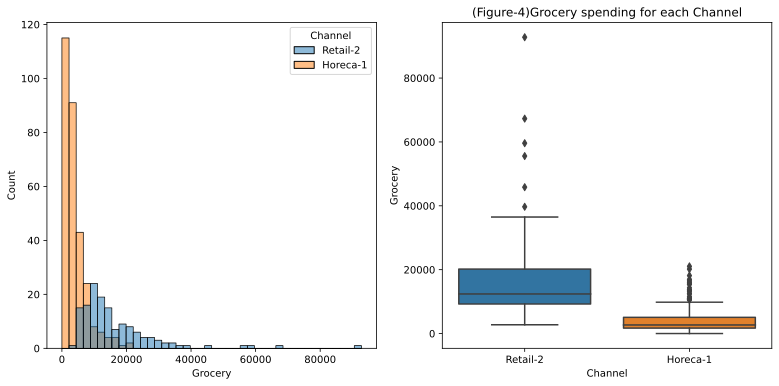

In [23]:
fig = plt.gcf() 
fig, ax =plt.subplots(1,2)
fig.set_size_inches(13,6)
sns.boxplot(graph_dataset["Channel"], graph_dataset["Grocery"],ax=ax[1])
sns.histplot( data = graph_dataset,x = "Grocery", hue = "Channel" , ax = ax[0])
plt.title("(Figure-4)Grocery spending for each Channel")
plt.savefig('grocery.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

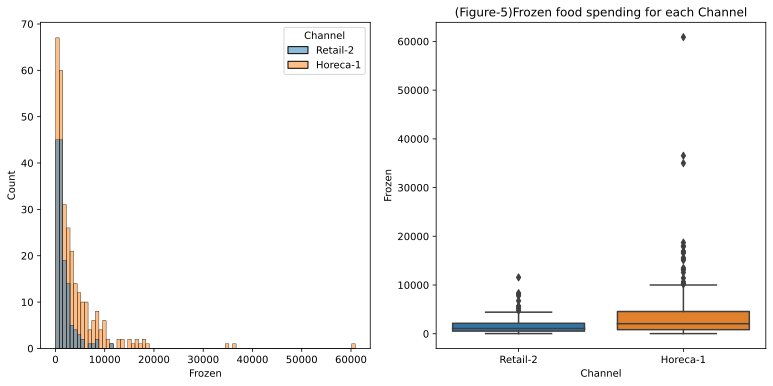

In [24]:
fig = plt.gcf() 
# sns.boxplot(graph_dataset["Channel"], graph_dataset["Frozen"])
# sns.histplot( data = graph_dataset,x = "Frozen", hue = "Channel" )
fig, ax =plt.subplots(1,2)
fig.set_size_inches(13,6)
# data_set = graph_dataset.where(graph_dataset["Frozen"]<20000)
sns.boxplot( graph_dataset["Channel"],graph_dataset["Frozen"], ax=ax[1])
sns.histplot( data = graph_dataset,x = "Frozen", hue = "Channel" , ax=ax[0])
# plt.title("detergent and paper spending for each Channel")
plt.title("(Figure-5)Frozen food spending for each Channel")
plt.savefig('frozen.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

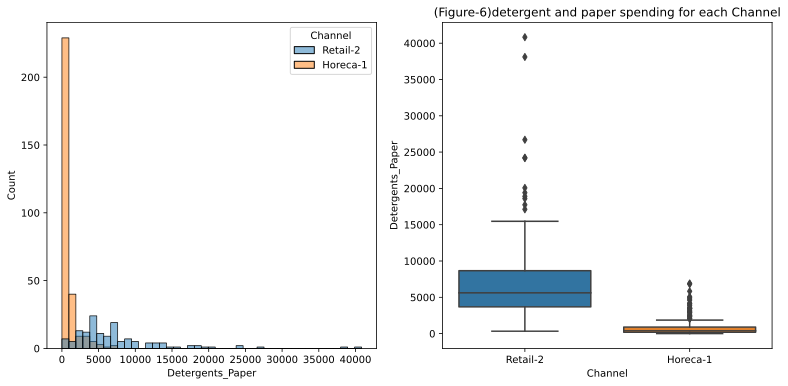

In [25]:
fig = plt.gcf() 
# fig.set_size_inches(10,8)
# sns.boxplot(graph_dataset["Channel"], graph_dataset["Detergents_Paper"])
# sns.histplot( data = graph_dataset,x = "Detergents_Paper", hue = "Channel" )

fig, ax =plt.subplots(1,2)
fig.set_size_inches(13,6)
# data_set = graph_dataset.where(graph_dataset["Detergents_Paper"]<20000)
sns.histplot( data = graph_dataset,x = "Detergents_Paper", hue = "Channel" , ax=ax[0])
sns.boxplot( graph_dataset["Channel"],graph_dataset["Detergents_Paper"], ax=ax[1])
plt.title("(Figure-6)detergent and paper spending for each Channel")
plt.savefig('detergent.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

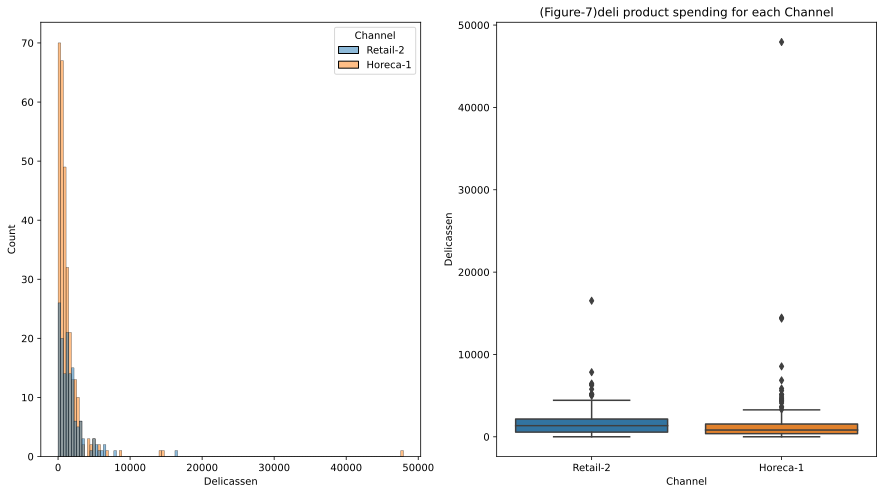

In [26]:
fig = plt.gcf() 



fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,8)
# data_set = graph_dataset.where(graph_dataset["Delicassen"]<20000)
# sns.boxplot( data_set["Channel"],data_set["Delicassen"], ax=ax[1])
# sns.histplot( data = data_set,x = "Delicassen", hue = "Channel" , ax=ax[0])
sns.boxplot( graph_dataset["Channel"],graph_dataset["Delicassen"], ax=ax[1])
sns.histplot( data = graph_dataset,x = "Delicassen", hue = "Channel" , ax=ax[0])

plt.title("(Figure-7)deli product spending for each Channel")

plt.savefig('deli.png', bbox_inches='tight')

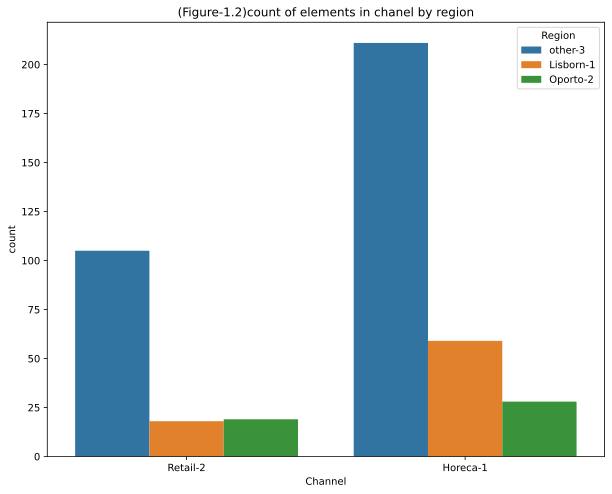

In [27]:
fig = plt.gcf() 
fig.set_size_inches(10,8)
sns.countplot(graph_dataset["Channel"],hue = graph_dataset["Region"])
plt.title("(Figure-1.2)count of elements in chanel by region")
plt.savefig("Region", bbox_inches = "tight")

<Figure size 720x720 with 0 Axes>

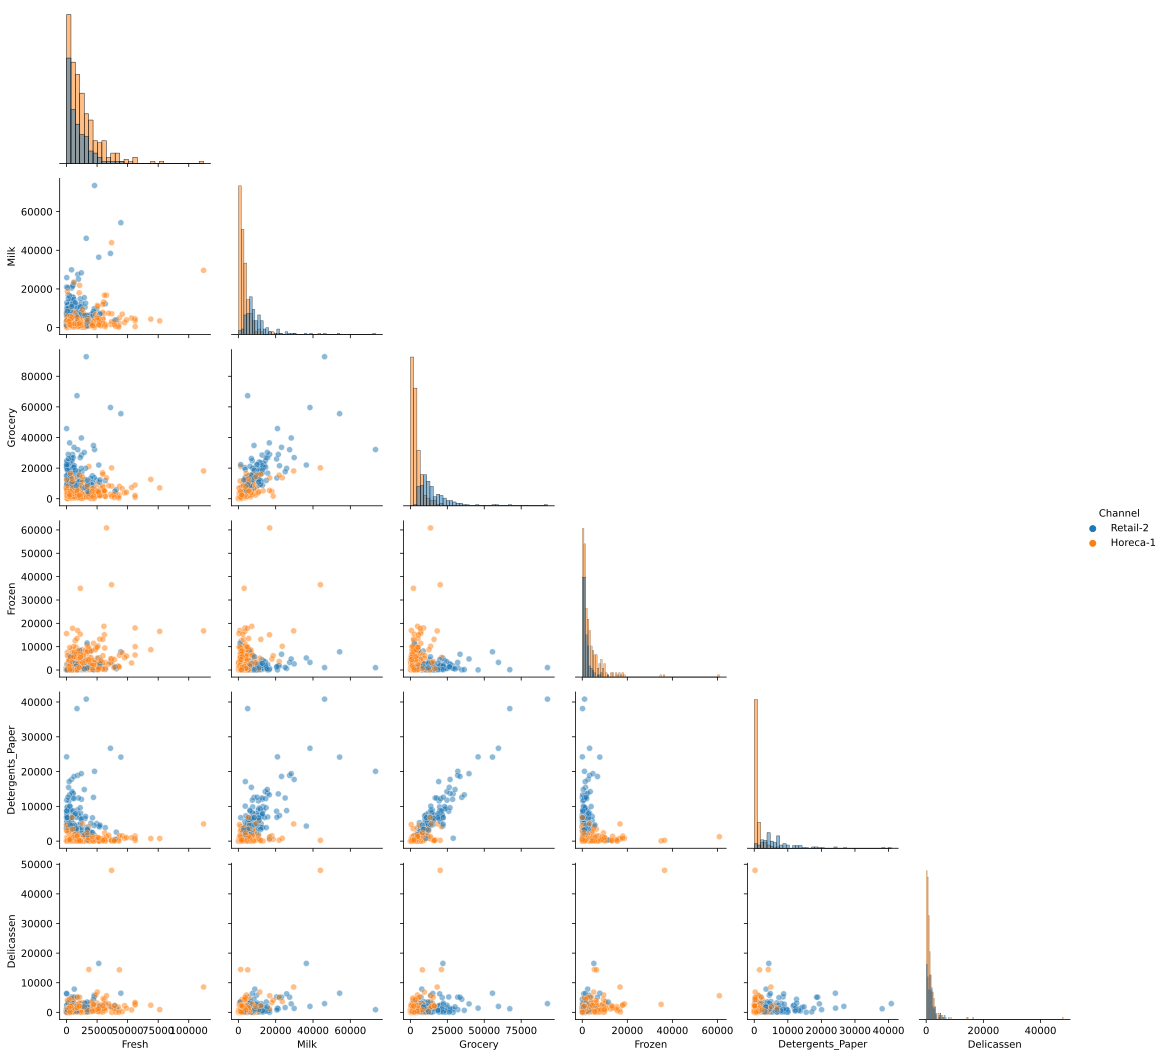

In [28]:
fig = plt.gcf() 
fig.set_size_inches(10,10)
m = sns.PairGrid(data =graph_dataset, hue = "Channel", diag_sharey=False, corner=True)
# plt.title("everyting")
m.map_diag(sns.histplot, alpha = 0.5)
m.map_offdiag(sns.scatterplot, alpha = 0.5)
m.add_legend()
plt.savefig('pairplot.png', bbox_inches='tight')

In [29]:
# fig = plt.gcf() 
# fig.set_size_inches(10,8)
# sns.set(font_scale = 2)
# sns.pairplot(data =sale )
# plt.show()


# Data Modeling

# using k nearest neighbour and decision tree



k nearest neigbours

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data = sale.copy()
data.drop("Channel", axis = 1,inplace = True)
# data.drop("Region", axis = 1,inplace = True)
# second_test = sale.drop("Channel",axis = 1).values
save_data = data.copy()
k_fold_data = data.copy()
k_fold_data =  k_fold_data.values
data = data.values
target_col = sale["Channel"]
target = sale["Channel"].values

In [32]:
data

array([[    3, 12669,  9656, ...,   214,  2674,  1338],
       [    3,  7057,  9810, ...,  1762,  3293,  1776],
       [    3,  6353,  8808, ...,  2405,  3516,  7844],
       ...,
       [    3, 14531, 15488, ...,   437, 14841,  1867],
       [    3, 10290,  1981, ...,  1038,   168,  2125],
       [    3,  2787,  1698, ...,    65,   477,    52]], dtype=int64)

In [33]:
target_col

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

training dataset

In [35]:
# #kfold method
# clf = KNeighborsClassifier(5)
# from sklearn.model_selection import KFold

# scores = []
# fits= []
# # kf = KFold(n_splits = 10, random_state = 0)
# kf =KFold(n_splits=10, random_state=0, shuffle=True)

# for trainIndex, testIndex in kf.split(data):
#     xTrainFold, xTestFold = data[trainIndex], data[testIndex]
#     yTrainFold, yTestFold = target_col[trainIndex], target_col[testIndex]
#     clf.fit(xTrainFold,yTrainFold)
#     fits.append(clf)
#     x = clf.score(xTestFold,yTestFold)
#     scores.append(x)
# print(max(scores))
    


random state 10

In [73]:
xTrain, xTest, yTrain, yTest = train_test_split(data,target,test_size = 0.20,random_state = 0)

In [37]:
# #cross validation
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error
# max = 20
# print("error value for k")
# errors = []
# for k in range(1, max):
#     model = KNeighborsRegressor(n_neighbors = k, p = 1)
#     model.fit(xTrain, yTrain)
#     yPre = model.predict(xTest)
#     error = mean_squared_error(yTest,yPre)
#     errors.append(error)
#     print("MSE value for k= ",k," is :", error)
# minK = np.argmin(errors)
# print("k = ",minK+1,"error = ",errors[minK])

In [74]:
list_score = []
max_range = 20
for i in range(1,max_range):
    xTrain, xTest, yTrain, yTest = train_test_split(data,target,test_size = 0.20,random_state = 0)
    clf = KNeighborsClassifier(i, p=1)
    fit = clf.fit(xTrain,yTrain)
    yPre = fit.predict(xTest)
    x =clf.score(xTest,yTest)
    list_score.append(x)
    print(f"matrix score of k =  {i}: "+str(x))

good_k = np.argmax(list_score)
print("k = ",good_k+1,"accuracy = ",list_score[good_k])

matrix score of k =  1: 0.8863636363636364
matrix score of k =  2: 0.8068181818181818
matrix score of k =  3: 0.9090909090909091
matrix score of k =  4: 0.8977272727272727
matrix score of k =  5: 0.9204545454545454
matrix score of k =  6: 0.8863636363636364
matrix score of k =  7: 0.9090909090909091
matrix score of k =  8: 0.9204545454545454
matrix score of k =  9: 0.9318181818181818
matrix score of k =  10: 0.9204545454545454
matrix score of k =  11: 0.9204545454545454
matrix score of k =  12: 0.9204545454545454
matrix score of k =  13: 0.9204545454545454
matrix score of k =  14: 0.9204545454545454
matrix score of k =  15: 0.9204545454545454
matrix score of k =  16: 0.9204545454545454
matrix score of k =  17: 0.9090909090909091
matrix score of k =  18: 0.9090909090909091
matrix score of k =  19: 0.9090909090909091
k =  9 accuracy =  0.9318181818181818


In [75]:
list_score = []
max_range = 20
for i in range(1,max_range):
    xTrain, xTest, yTrain, yTest = train_test_split(data,target,test_size = 0.20,random_state = 0)
    clf = KNeighborsClassifier(i, p=2)
    fit = clf.fit(xTrain,yTrain)
    yPre = fit.predict(xTest)
    x =clf.score(xTest,yTest)
    list_score.append(x)
    print(f"matrix score of k =  {i}: "+str(x))
good_k = np.argmax(list_score)
print("k = ",good_k+1,"accuracy = ",list_score[good_k])

matrix score of k =  1: 0.8863636363636364
matrix score of k =  2: 0.8522727272727273
matrix score of k =  3: 0.9090909090909091
matrix score of k =  4: 0.8863636363636364
matrix score of k =  5: 0.9204545454545454
matrix score of k =  6: 0.9090909090909091
matrix score of k =  7: 0.9090909090909091
matrix score of k =  8: 0.9090909090909091
matrix score of k =  9: 0.9318181818181818
matrix score of k =  10: 0.8863636363636364
matrix score of k =  11: 0.9204545454545454
matrix score of k =  12: 0.9318181818181818
matrix score of k =  13: 0.9431818181818182
matrix score of k =  14: 0.9204545454545454
matrix score of k =  15: 0.9318181818181818
matrix score of k =  16: 0.9204545454545454
matrix score of k =  17: 0.9204545454545454
matrix score of k =  18: 0.9090909090909091
matrix score of k =  19: 0.9090909090909091
k =  13 accuracy =  0.9431818181818182


when metric uses p = 2, the accuracy is 0.001 better, thus p= 2 will be used

code used to show best K-value for minkowski metric

In [76]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
columns  =7
col_Ind_Random = shuffle(range(0,columns),random_state =2)
for cur_f in range(0, columns):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data[:, new_Ind]
    xTrain, xTest, yTrain, yTest = train_test_split(newData,target,test_size = 0.2,random_state = 0)
    clf = KNeighborsClassifier(n_neighbors =13, weights='distance', p=2)
    fit = clf.fit(xTrain, yTrain)
    cur_Score = clf.score(xTest, yTest)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print(str(len(new_Ind)) + ": " + str(cur_Score))
print("features selected:")
print(new_Ind)

1: 0.6136363636363636
2: 0.6590909090909091
3: 0.9318181818181818
4: 0.9431818181818182
5: 0.9545454545454546
6: 0.9545454545454546
features selected:
[4, 1, 3, 6, 5, 0]


In [77]:
new_Ind = []
cur_MaxScore = 0.0
columns  =7
col_Ind_Random = shuffle(range(0,columns),random_state =5)
for cur_f in range(0, columns):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data[:, new_Ind]
    xTrain, xTest, yTrain, yTest = train_test_split(newData,target,test_size = 0.2,random_state = 0)
    clf = KNeighborsClassifier(n_neighbors =9, weights='distance', p=2)
    fit = clf.fit(xTrain, yTrain)
    cur_Score = clf.score(xTest, yTest)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print(str(len(new_Ind)) + ": " + str(cur_Score))
print("features selected:")
print(new_Ind)

1: 0.6022727272727273
2: 0.7954545454545454
3: 0.8409090909090909
4: 0.8409090909090909
5: 0.8977272727272727
features selected:
[6, 2, 4, 0, 5]


using less columns could lead to an overreliance on one column which could lead to errors

columns that will be used in KNN are
- Region
- Grocery
- Frozen
- Milk
- Fresh
- Detergents_paper

column that will be dropped:


- Delicassen

In [78]:
# save_data.drop("Milk",axis = 1, inplace = True)
# save_data.drop("Fresh",axis = 1, inplace = True)
save_data.drop("Delicassen",axis = 1, inplace = True)

save_data = save_data.values

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

the optimal K value usually found is the square root of N, where N is the total number of samples

In [79]:
xTrain, xTest, yTrain, yTest = train_test_split(save_data,target,test_size = 0.20,random_state = 0)

In [80]:
from sklearn import metrics

In [81]:
print(xTrain)
print(xTrain.shape)

[[    3  5181 22044 21531  1740  7353]
 [    1  1073  9679 15445    61  5980]
 [    3 22615  5410  7198  3915  1777]
 ...
 [    3  6990  3880  5380  1647   319]
 [    3 44466 54259 55571  7782 24171]
 [    3   955  5479  6536   333  2840]]
(352, 6)


In [46]:
print(yTrain)
print(yTrain.shape)

[2 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 1 1 2 2 2 2 1
 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1
 1 2 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1
 2 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2
 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2
 2 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1
 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 2 1 2 1 1 1
 2 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1]
(352,)


In [82]:
print(xTest)
print(xTest.shape)

[[    1  1537  3748  5838  1859  3381]
 [    3  5981 14641 20521  2005 12218]
 [    1  8040  3795  2070  6340   918]
 [    2  9759 25071 17645  1128 12408]
 [    3 27329  1449  1947  2436   204]
 [    3 31714 12319 11757   287  3881]
 [    3   355  7704 14682   398  8077]
 [    3 68951  4411 12609  8692   751]
 [    3   894  1703  1841   744   759]
 [    2 11800  2713  3558  2121   706]
 [    3  3366  5403 12974  4400  5977]
 [    1  1107 11711 23596   955  9265]
 [    3  1206  3620  2857  1945   353]
 [    3 25767  3613  2013 10303   314]
 [    1  7858  1110  1094  6818    49]
 [    3  2787  1698  2510    65   477]
 [    3 15168 10556 12477  1920  6506]
 [    3    23  2616  8118   145  3874]
 [    3 27167  2801  2128 13223    92]
 [    3 37036  7152  8253  2995    20]
 [    2 32717 16784 13626 60869  1272]
 [    3   200 25862 19816   651  8773]
 [    1 11686  2154  6824  3527   592]
 [    1  6373   780   950   878   288]
 [    3  5567   871  2010  3383   375]
 [    3  9602  1316  1263

In [83]:
print(yTest)
print(yTest.shape)

[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 2 2
 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 1 2 1 1 2 1
 1 1 1 1 1 1 2 1 2 1 2 2 2 1]
(88,)


In [84]:

clf = KNeighborsClassifier(13, p=2)#need to change that
fit = clf.fit(xTrain,yTrain)
yPre = fit.predict(xTest)
x =clf.score(xTest,yTest)
cm = confusion_matrix(yTest,yPre)
print("matrix")
print(cm)
print("matrix score: "+str(x))
# print()
print("classification report:")
print(classification_report(yTest,yPre))

matrix
[[55  1]
 [ 6 26]]
matrix score: 0.9204545454545454
classification report:
              precision    recall  f1-score   support

           1       0.90      0.98      0.94        56
           2       0.96      0.81      0.88        32

    accuracy                           0.92        88
   macro avg       0.93      0.90      0.91        88
weighted avg       0.92      0.92      0.92        88



cross validation

In [50]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits = 5, random_state = 0, shuffle = True)

In [51]:
# for train, test in kf.split(data):
# #     print("TRAIN:", train, "TEST:", test)
#     xTrain_cross, xTest_cross = data[train], data[test]
#     yTrain_cross, yTest_cross = target_col[train], target_col[test]

decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
xTrain_tree  ,xTest_tree,yTrain_tree,yTest_tree  = train_test_split(data,target,test_size = 0.25,random_state = 0)

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [54]:
k = KFold(n_splits = 5, random_state = 0, shuffle = True)
cnt = 1
for train_index  in k.split(data):
    print(f'Fold:{cnt}, Train set: {len(train_index)}')
    cnt+=1

Fold:1, Train set: 2
Fold:2, Train set: 2
Fold:3, Train set: 2
Fold:4, Train set: 2
Fold:5, Train set: 2


In [58]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
min_split = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
scores = []
for i in range(0,10):
    #for mins in min_split:
    for value in max_depth:
        kfclf =DecisionTreeClassifier(max_depth = value,random_state = i, max_features ="auto" )
        fit = kfclf.fit(xTrain_tree, yTrain_tree)
        score = fit.score(xTest_tree,yTest_tree)
        scores.append(score)
        print(f"random state ={i}, depth of {value}, score = {score}")
         #, min split = {mins}

random state =0, depth of 1, score = 0.6363636363636364
random state =0, depth of 2, score = 0.8909090909090909
random state =0, depth of 3, score = 0.8727272727272727
random state =0, depth of 4, score = 0.8909090909090909
random state =0, depth of 5, score = 0.8636363636363636
random state =0, depth of 6, score = 0.8909090909090909
random state =0, depth of 7, score = 0.8636363636363636
random state =0, depth of 8, score = 0.8454545454545455
random state =0, depth of 9, score = 0.8272727272727273
random state =0, depth of 10, score = 0.8272727272727273
random state =0, depth of 11, score = 0.8272727272727273
random state =0, depth of 12, score = 0.8272727272727273
random state =0, depth of 13, score = 0.8272727272727273
random state =0, depth of 14, score = 0.8272727272727273
random state =0, depth of 15, score = 0.8272727272727273
random state =1, depth of 1, score = 0.7909090909090909
random state =1, depth of 2, score = 0.7909090909090909
random state =1, depth of 3, score = 0.863

max depth can range from 1-4

In [ ]:
xTrain_tree.shape

In [ ]:
yTrain_tree.shape


In [ ]:
xTest_tree.shape

In [ ]:
yTest_tree.shape

In [71]:
treeClf = DecisionTreeClassifier(max_depth = 2,random_state = 2)#change param here
treeFit =treeClf.fit(xTrain_tree, yTrain_tree)
#best parameter
#test everyone
# search online
yPre_tree = treeFit.predict(xTest_tree)
# print(yPre_tree)
# print(yPre_tree.shape)
print("Matrix: ")
cmTree = confusion_matrix(yTest_tree,yPre_tree)
print(cmTree)
print("matrix score: "+ str(treeClf.score(xTest_tree,yTest_tree).round(3)))
print("classification report: ")
print(classification_report(yTest_tree,yPre_tree))

Matrix: 
[[66  4]
 [11 29]]
matrix score: 0.864
classification report: 
              precision    recall  f1-score   support

           1       0.86      0.94      0.90        70
           2       0.88      0.72      0.79        40

    accuracy                           0.86       110
   macro avg       0.87      0.83      0.85       110
weighted avg       0.87      0.86      0.86       110



In [88]:
treeClf = DecisionTreeClassifier(max_depth = 2,random_state = 2, max_features = "auto")#change param here
treeFit =treeClf.fit(xTrain_tree, yTrain_tree)
#best parameter
#test everyone
# search online
yPre_tree = treeFit.predict(xTest_tree)
# print(yPre_tree)
# print(yPre_tree.shape)
print("Matrix: ")
cmTree = confusion_matrix(yTest_tree,yPre_tree)
print(cmTree)
print("matrix score: "+ str(treeClf.score(xTest_tree,yTest_tree).round(3)))
print("classification report: ")
print(classification_report(yTest_tree,yPre_tree))

Matrix: 
[[63  7]
 [ 4 36]]
matrix score: 0.9
classification report: 
              precision    recall  f1-score   support

           1       0.94      0.90      0.92        70
           2       0.84      0.90      0.87        40

    accuracy                           0.90       110
   macro avg       0.89      0.90      0.89       110
weighted avg       0.90      0.90      0.90       110



In [ ]:
from sklearn import tree
targetname = ['Hoerca', 'Retail']
feature_name = ['Region',"Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicansen"]
# with open("whole_sale.dot",'w') as f:
    
#     f =tree.export_graphviz(treeClf, out_file = f, feature_names =targetname, filled=True, rounded=True,
#     special_characters=True)
fig = plt.figure(figsize = (25,20))
thing = tree.plot_tree(treeClf, feature_names =feature_name, class_names = targetname, filled = True )
fig.savefig("decistion_tree.png")

In [70]:
from sklearn import tree
targetname = ['Hoerca', 'Retail']
feature_name = ['Region',"Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicansen"]
with open("second_test.dot",'w') as f:
    f = tree.export_graphviz(treeClf, out_file=f, 
                                feature_names=feature_name , 
                                class_names=targetname,
                                filled=True,rounded=True, 
                             special_characters=True)